# Doctor Consultation Fees Project

Exploratory Data Analysis

Importing Libraries for EDA

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Importing the dataset

In [2]:
traindf=pd.read_excel('Final_Train.xlsx')
testdf=pd.read_excel('Final_Test.xlsx')

First 5 entries

In [3]:
traindf.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


Last 5 entries

In [4]:
testdf.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...


In [5]:
traindf.shape

(5961, 7)

The training dataset contains 5961 rows and 7 columns

In [6]:
testdf.shape

(1987, 6)

The testing dataset contains 5961 rows and 7 columns

Information about the features

In [7]:
traindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       5961 non-null   object
 1   Experience          5961 non-null   object
 2   Rating              2659 non-null   object
 3   Place               5936 non-null   object
 4   Profile             5961 non-null   object
 5   Miscellaneous_Info  3341 non-null   object
 6   Fees                5961 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 326.1+ KB


In [8]:
testdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       1987 non-null   object
 1   Experience          1987 non-null   object
 2   Rating              897 non-null    object
 3   Place               1981 non-null   object
 4   Profile             1987 non-null   object
 5   Miscellaneous_Info  1153 non-null   object
dtypes: object(6)
memory usage: 93.3+ KB


# Missing Values

In [9]:
traindf.isnull().sum()

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

Heatmap of the null values

<AxesSubplot:>

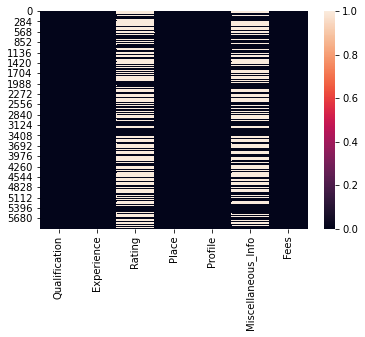

In [10]:
sns.heatmap(traindf.isnull())

columns "Rating" and "Miscellaneous_Info" contain null values

In [11]:
testdf.isnull().sum()

Qualification            0
Experience               0
Rating                1090
Place                    6
Profile                  0
Miscellaneous_Info     834
dtype: int64

<AxesSubplot:>

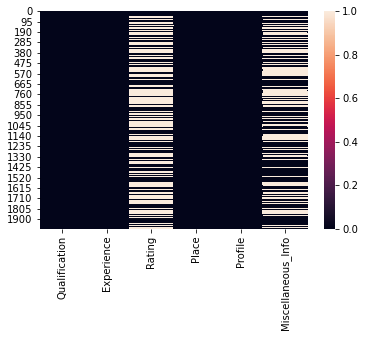

In [12]:
sns.heatmap(testdf.isnull())

In testing data also "Rating and "Miscellaneous_Info" contains null values

In [13]:
testdf['Fees']=0

In [14]:
df=pd.concat([traindf,testdf],ignore_index=True)

In [15]:
df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


# Statistical Calculation

In [16]:
df.describe(include="O")

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
count,7948,7948,3556,7917,7948,4494
unique,1801,64,52,948,6,3980
top,BDS,9 years experience,100%,"Andheri West, Mumbai",Dentist,Acrylic Partial Denture Crowns and Bridges Fix...
freq,632,419,907,97,1838,50


In [17]:
df.describe()

,Fees
count,7948.000000
mean,230.958480
std,212.413839
min,0.000000
25%,3.750000
50%,200.000000
75%,400.000000
max,950.000000


# Treating null values

In [18]:
df['Experience']=df['Experience'].str.split().str[0].astype(int)

In [19]:
df.head(2)

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350


In [20]:
df["Rating"]=df["Rating"].str.strip("%")

In [21]:
df["Rating"]=df["Rating"].astype(float)

In [22]:
df['Rating'].fillna(0,inplace=True)

In [23]:
df.isnull().sum()

Qualification            0
Experience               0
Rating                   0
Place                   31
Profile                  0
Miscellaneous_Info    3454
Fees                     0
dtype: int64

In [24]:
df.head(2)

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24,100.0,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12,98.0,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350


In [25]:
df['Place'].fillna(df['Place'].mode()[0],inplace=True)

In [26]:
df['Area']=df['Place'].str.split(" ").str[0].str.replace(",","")
df['City']=df['Place'].str.split(" ").str[1]
df.drop('Place',axis=1,inplace=True)

In [27]:
df.head(2)

,Qualification,Experience,Rating,Profile,Miscellaneous_Info,Fees,Area,City
0,"BHMS, MD - Homeopathy",24,100.0,Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,Kakkanad,Ernakulam
1,"BAMS, MD - Ayurveda Medicine",12,98.0,Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,Whitefield,Bangalore


In [28]:
df.drop(['Miscellaneous_Info'],axis=1,inplace=True)

Encoding target variable

In [29]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
df['Qualification'] = LE.fit_transform(df['Qualification'])
df.head(2)

,Qualification,Experience,Rating,Profile,Fees,Area,City
0,491,24,100.0,Homeopath,100,Kakkanad,Ernakulam
1,92,12,98.0,Ayurveda,350,Whitefield,Bangalore


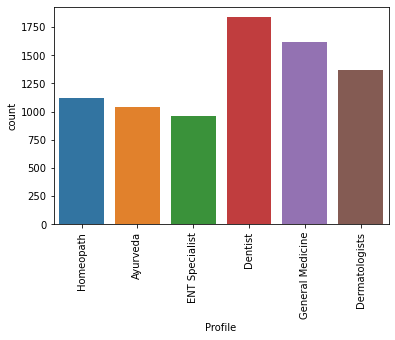

In [30]:
sns.countplot(x="Profile",data=df)
plt.xticks(rotation=90);

Above plot shows that among the profiles "Dentist" has the highest count.

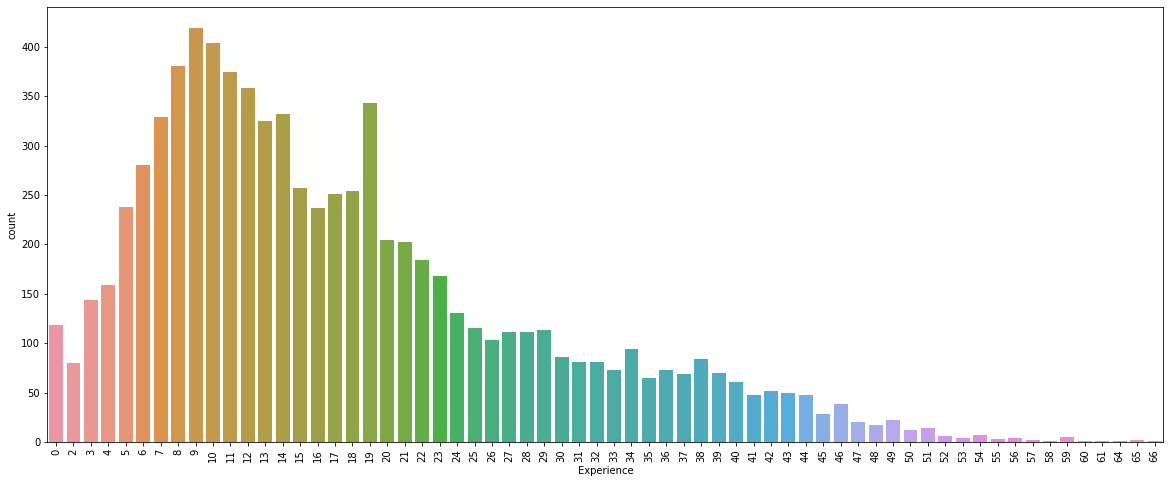

In [31]:
plt.figure(figsize=(20,8))
sns.countplot(x="Experience",data=df)
plt.xticks(rotation=90);

9 years of experience has the highest count.

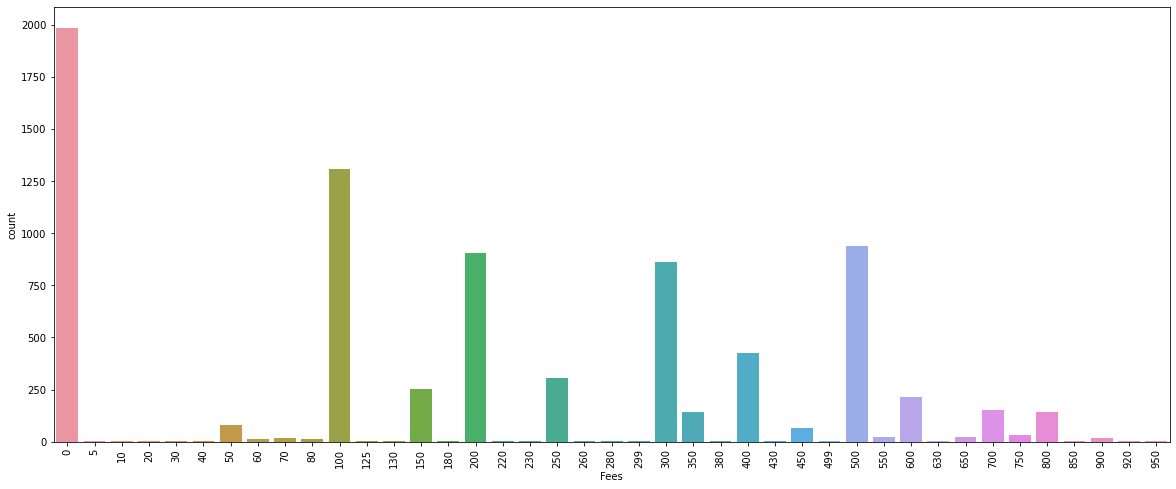

In [32]:
plt.figure(figsize=(20,8))
sns.countplot(x="Fees",data=df)
plt.xticks(rotation=90);

'0' represents the null values. Fees 100 has the highest count.

<AxesSubplot:xlabel='Experience', ylabel='Fees'>

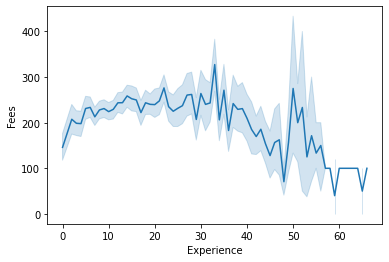

In [33]:
sns.lineplot(x="Experience",y="Fees",data=df)

Above plot shows that experience between 30-40 has highest fees.

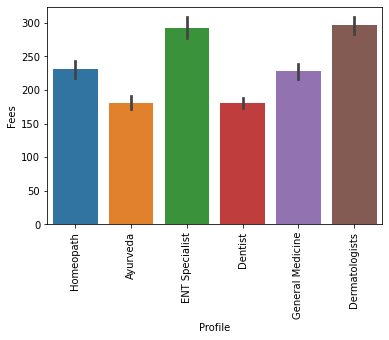

In [34]:
sns.barplot(x="Profile",y="Fees",data=df)
plt.xticks(rotation=90);

Above plot shows that among different profiles "Dermatologists" and "ENT Specialist" have highest fees.

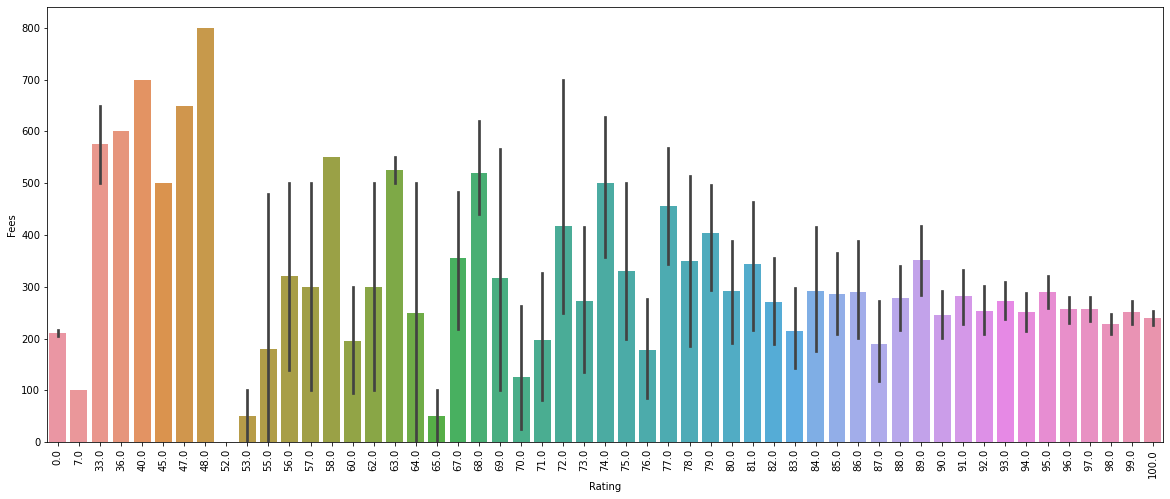

In [35]:
plt.figure(figsize=(20,8))
sns.barplot(x="Rating",y="Fees",data=df)
plt.xticks(rotation=90);

Above plot shows that rating 48 has the highest fees.

# Encoding

In [36]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['Area']=LE.fit_transform(df['Area'])
df['City']=LE.fit_transform(df['City'])
df['Profile']=LE.fit_transform(df['Profile'])


In [37]:
df.head()

,Qualification,Experience,Rating,Profile,Fees,Area,City
0,491,24,100.0,5,100,256,45
1,92,12,98.0,0,350,777,20
2,1442,9,0.0,3,300,406,0
3,572,12,0.0,0,250,59,108
4,16,20,100.0,0,250,295,32


# Separating x(Independent) and y(target) variable.

In [38]:
x=df.drop('Fees',axis=1)
y=df['Fees']

# Scaling

In [39]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7948 entries, 0 to 7947
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Qualification  7948 non-null   int32  
 1   Experience     7948 non-null   int32  
 2   Rating         7948 non-null   float64
 3   Profile        7948 non-null   int32  
 4   Fees           7948 non-null   int64  
 5   Area           7948 non-null   int32  
 6   City           7948 non-null   int32  
dtypes: float64(1), int32(5), int64(1)
memory usage: 279.5 KB


# Train Test Split

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [42]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=45)

# Model Building

In [43]:
lm=LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [44]:
lm.intercept_

168.88470326560815

In [45]:
lm.score(x_train,y_train)

0.04563480414376442

In [46]:
pred=lm.predict(x_test)
print("Predicted Sales:",pred)
print("Actual Sales:",y_test)

Predicted Sales: [294.31704595 234.37764102 243.29001761 ... 263.32660152 222.82873152
 218.53902641]
Actual Sales: 3715    500
3309    400
2870    400
5864    500
2780    100
       ... 
414     150
2090    400
3796    200
1964    100
2690    150
Name: Fees, Length: 2385, dtype: int64


In [47]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
print("r2 Score:",r2_score(y_test,pred))
print("Error:")
print("Mean Absolute Error:",mean_absolute_error(y_test,pred))
print("Mean Squared Error:",mean_squared_error(y_test,pred))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test,pred)))

r2 Score: 0.035089873831229856
Error:
Mean Absolute Error: 173.71974885354985
Mean Squared Error: 44844.48225304885
Root Mean Squared Error: 211.76515826039196


In [48]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)

DecisionTreeRegressor()

In [49]:
dtr.score(x_train,y_train)

0.9956230715074843

In [50]:
dtr.score(x_test,y_test)

-0.8933186611671509

In [51]:
preddtr=dtr.predict(x_test)
print("Predicted Sales:",preddtr)
print("Actual Sales:",y_test)

Predicted Sales: [700.   0.   0. ... 700. 100. 200.]
Actual Sales: 3715    500
3309    400
2870    400
5864    500
2780    100
       ... 
414     150
2090    400
3796    200
1964    100
2690    150
Name: Fees, Length: 2385, dtype: int64


In [52]:
print("r2 Score:",r2_score(y_test,preddtr))
print("Error:")
print("Mean Absolute Error:",mean_absolute_error(y_test,preddtr))
print("Mean Squared Error:",mean_squared_error(y_test,preddtr))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test,preddtr)))

r2 Score: -0.8933186611671509
Error:
Mean Absolute Error: 220.1545110154842
Mean Squared Error: 87992.54230774443
Root Mean Squared Error: 296.63536927976816


In [53]:
from sklearn.svm import SVR
svr=SVR()
svr.fit(x_train,y_train)

SVR()

In [54]:
svr.score(x_train,y_train)

0.026578521077532558

In [55]:
predsvr=svr.predict(x_test)
print("Predicted Sales:",predsvr)
print("Actual Sales:",y_test)

Predicted Sales: [254.57261721 216.56513459 224.97594795 ... 214.75159539 164.521497
 176.26480554]
Actual Sales: 3715    500
3309    400
2870    400
5864    500
2780    100
       ... 
414     150
2090    400
3796    200
1964    100
2690    150
Name: Fees, Length: 2385, dtype: int64


In [56]:
print("r2 Score:",r2_score(y_test,predsvr))
print("Error:")
print("Mean Absolute Error:",mean_absolute_error(y_test,predsvr))
print("Mean Squared Error:",mean_squared_error(y_test,predsvr))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test,predsvr)))

r2 Score: 0.01682547043935856
Error:
Mean Absolute Error: 170.6828967908142
Mean Squared Error: 45693.32577904791
Root Mean Squared Error: 213.75997234994188


In [57]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)

RandomForestRegressor()

In [58]:
rfr.score(x_train,y_train)

0.8623490450300046

In [59]:
predrfr=rfr.predict(x_test)
print("Predicted Sales:",predrfr)
print("Actual Sales:",y_test)

Predicted Sales: [397.5        441.         217.66666667 ... 223.         102.5
 143.        ]
Actual Sales: 3715    500
3309    400
2870    400
5864    500
2780    100
       ... 
414     150
2090    400
3796    200
1964    100
2690    150
Name: Fees, Length: 2385, dtype: int64


In [60]:
print("r2 Score:",r2_score(y_test,predrfr))
print("Error:")
print("Mean Absolute Error:",mean_absolute_error(y_test,predrfr))
print("Mean Squared Error:",mean_squared_error(y_test,predrfr))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test,predrfr)))

r2 Score: 0.010202296497786811
Error:
Mean Absolute Error: 170.77477664133104
Mean Squared Error: 46001.13973832408
Root Mean Squared Error: 214.47876290748246


In [61]:
from xgboost import XGBRegressor
model=XGBRegressor(n_estimators=1000,learning_rate=0.05)
model.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [62]:
y_pred=model.predict(x_test)
y_pred

array([317.9964 , 307.14798, 281.59085, ..., 145.23741, 171.11624,
       129.43791], dtype=float32)

In [63]:
model.score(x_train,y_train)

0.7511758554745903

In [64]:
predxgb=model.predict(x_test)
print("Predicted Sales:",predxgb)
print("Actual Sales:",y_test)

Predicted Sales: [317.9964  307.14798 281.59085 ... 145.23741 171.11624 129.43791]
Actual Sales: 3715    500
3309    400
2870    400
5864    500
2780    100
       ... 
414     150
2090    400
3796    200
1964    100
2690    150
Name: Fees, Length: 2385, dtype: int64


In [65]:
print("r2 Score:",r2_score(y_test,predxgb))
print("Error:")
print("Mean Absolute Error:",mean_absolute_error(y_test,predxgb))
print("Mean Squared Error:",mean_squared_error(y_test,predxgb))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test,predxgb)))

r2 Score: -0.03040211585618624
Error:
Mean Absolute Error: 171.08264073353394
Mean Squared Error: 47888.241759351826
Root Mean Squared Error: 218.83382224727472


# Cross Validation

In [66]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k=5
kfold=KFold(n_splits=k,shuffle=True)
K_results=cross_val_score(lm,x,y,cv=kfold)
accuracy=np.mean(abs(K_results))
accuracy

0.040586189778178336

In [67]:
from sklearn.model_selection import KFold
k=5
kfold=KFold(n_splits=k,shuffle=True)
K_results=cross_val_score(dtr,x,y,cv=kfold)
accuracy=np.mean(abs(K_results))
accuracy

0.8740966304597076

In [68]:
k=5
kfold=KFold(n_splits=k,shuffle=True)
K_results=cross_val_score(svr,x,y,cv=kfold)
accuracy=np.mean(abs(K_results))
accuracy

0.020849745743258086

In [69]:
k=5
kfold=KFold(n_splits=k,shuffle=True)
K_results=cross_val_score(rfr,x,y,cv=kfold)
accuracy=np.mean(abs(K_results))
accuracy

0.017529397097126354

In [70]:
k=5
kfold=KFold(n_splits=k,shuffle=True)
K_results=cross_val_score(model,x,y,cv=kfold)
accuracy=np.mean(abs(K_results))
accuracy

0.014877100658093844

Decision Tree Regressor is our best model.

In [73]:
from sklearn.model_selection import GridSearchCV
parameters={'splitter':['best', 'random'],'max_depth':list(np.arange(1,10)),
            'min_samples_split':list(np.arange(1,11)),'min_samples_leaf':list(np.arange(1,10))}
dt=DecisionTreeRegressor()
clf=GridSearchCV(dt,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'splitter': 'random'}


In [74]:
dt=DecisionTreeRegressor(max_depth=5,min_samples_split=2,min_samples_leaf=2,splitter='random')
dt.fit(x_train,y_train)
dt.score(x_train,y_train)
pred_decision=dt.predict(x_test)
rfs=r2_score(y_test,pred_decision)
print('R2 score:',rfs*100)

R2 score: 5.842134928670828


# Model Saving

In [77]:
import pickle
filename='Fees.pkl'
pickle.dump(dt,open(filename,'wb'))

In [78]:
loaded_model=pickle.load(open('Fees.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result)

0.05842134928670828
